<a href="https://colab.research.google.com/github/smpark0520/ESAA/blob/main/%EB%94%A5%EB%9F%AC%EB%8B%9D_%ED%8C%8C%EC%9D%B4%ED%86%A0%EC%B9%98_%EA%B5%90%EA%B3%BC%EC%84%9C_ch7_1~3_p_360~371.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 7. 시계열 분석

## 7.1 시계열 문제


### 시계열 분석  (Time Series Analysis)

 **시간의 흐름에 따라 수집된 데이터**를 분석하여 **추세 파악 및 예측**에 사용하는 기법

대표적인 예: 주가, 환율, 기온, 습도 등

###  시계열 변동의 구성 요소

1. **불규칙 변동 (Irregular Variation)** :
   예측 불가능한 우연적 변동
   예: 전쟁, 지진, 화재, 파업 등

2. **추세 변동 (Trend Variation)** :
   장기적 증가 또는 감소 경향
   예: GDP, 인구 증가율 등

3. **순환 변동 (Cyclical Variation)** :
   장기적인 경제 주기와 같은 반복적인 변동
   예: 경기 변동

4. **계절 변동 (Seasonal Variation)** :
   계절 또는 사회적 요인에 따른 1년 주기의 반복 패턴

###  시계열 데이터의 유형

* **규칙적 시계열**: 추세와 분산이 일정
* **불규칙적 시계열**: 추세 또는 분산이 시간에 따라 변화

###  주요 분석 기법

* **통계 기반 모델**

  * AR (자기회귀)
  * MA (이동 평균)
  * ARMA (자기회귀 + 이동 평균)
  * ARIMA (비정상 시계열을 위한 통합 모델)


## 7.2 AR, MA, ARMA, ARIMA

### 7.2.1 AR 모델

-  **자기회귀 모델**이라고 하며, **과거의 데이터가 현재에 영향을 준다**는 가정을 기반으로 함.

###  AR(p) 모델 수식

$$
Z_t = \phi_1 Z_{t-1} + \phi_2 Z_{t-2} + \cdots + \phi_p Z_{t-p} + a_t
$$

### 구성 요소 설명:

* $Z_t$: 현재 시점의 데이터
* $\phi_1, \phi_2, \dots, \phi_p$: **모수 (파라미터)** — 과거가 현재에 미치는 영향의 크기
* $Z_{t-1}, Z_{t-2}, \dots, Z_{t-p}$: 과거 시점의 데이터
* $a_t$: **오차항 (백색 잡음, white noise)** — 예측할 수 없는 무작위 요인

### 핵심 개념

* 현재의 값은 과거 $p$개의 값에 **선형적으로 의존**
* $p$: 시차(lag)의 수
* 오차항 $a_t$는 **평균이 0이고, 자기상관이 없는** 순수 랜덤값



### 7.2.2 MA 모델

- **이동 평균 모델**이라고 하며, 과거 오차(백색 잡음)를 기반으로 현재 값을 예측

- 시계열 데이터를 일정한 윈도우 크기로 슬라이딩하며 평균을 계산

- AR 모델이 과거 **데이터 값**을 사용하는 반면, MA 모델은 과거 **오차항**을 사용

###  MA(q) 모델 수식

$$
Z_t = \theta_1 a_{t-1} + \theta_2 a_{t-2} + \cdots + \theta_q a_{t-q} + a_t
$$

### 구성 요소 설명:

* $Z_t$: 현재 시점의 데이터
* $\theta_1, \theta_2, \dots, \theta_q$: **모수 (파라미터)** — 과거 오차가 현재에 미치는 영향의 크기
* $a_{t-1}, a_{t-2}, \dots, a_{t-p}$: 과거 시점의 **오차항 (백색 잡음)**
* $a_t$: 현재 시점의 오차항



### 7.2.3 ARMA 모델

- AR(자기회귀) + MA(이동 평균)
- 과거의 데이터 값과 과거의 오차 항을 함께 이용하여 현재 값을 예측

###  ARMA(p, q) 수식

$$
Z_t = \alpha + \phi_1 Z_{t-1} + \cdots + \phi_p Z_{t-p} + \theta_1 a_{t-1} + \cdots + \theta_q a_{t-q} + a_t
$$

### 구성 요소 :

* $Z_t$: 현재 시점의 데이터
* $\alpha$: 상수항
* $\phi_1, \dots, \phi_p$: 자기회귀(AR) 계수
* $\theta_1, \dots, \theta_q$: 이동 평균(MA) 계수
* $a_t$: 현재 시점의 오차항 (백색 잡음)




### 7.2.4 ARIMA 모델

- AR(자기회귀) + I(차분) + MA(이동 평균)요소를 모두 결합한 시계열 모델
- ARMA 모델에 추세를 제거하기 위한 차분(differencing) 과정을 추가한 확장형

### ARIMA(p, d, q)

$$
\text{ARIMA}(p, d, q)
$$

* $p$: 자기회귀(AR) 차수
* $d$: 차분 횟수 (데이터의 추세 제거)
* $q$: 이동 평균(MA) 차수

### 핵심 특징

* 비정상 시계열 데이터를 차분(d차수)을 통해 정상성(stationary)으로 변환한 뒤 모델 적용
* 추세가 있는 시계열 데이터에 적합

### 구현 절차 (with `statsmodels`)

```python
from statsmodels.tsa.arima.model import ARIMA

# 1. 모델 정의 (예: p=2, d=1, q=2)
model = ARIMA(data, order=(2, 1, 2))

# 2. 모델 학습
model_fit = model.fit()

# 3. 예측
forecast = model_fit.predict(start=len(data), end=len(data)+10)
```




- ARIMA(5, 1, 0) 모델 적용

* $p = 5$: 5시점 이전까지의 자기회귀 사용
* $d = 1$: 1차 차분으로 비정상 시계열을 정상 시계열로 변환
* $q = 0$: 이동 평균 요소는 사용하지 않음



In [1]:
pip install statsmodels

Cloning into '080289'...
remote: Enumerating objects: 2278, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 2278 (delta 4), reused 27 (delta 3), pack-reused 2246 (from 1)
Receiving objects: 100% (2278/2278), 330.30 MiB | 32.26 MiB/s, done.
Resolving deltas: 100% (13/13), done.
Updating files: 100% (2591/2591), done.
/content/080289/chap05/data/catanddog


<ipython-input-7-4ed3f7afe0ad>:14: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = read_csv('/content/080289/chap07/data/sales.csv', header=0, parse_dates=[0], index_col=0,
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -199.651
Date:                Wed, 28 May 2025   AIC                            411.302
Time:                        15:57:39   BIC                            420.634
Sample:                    01-01-1991   HQIC                           414.523
                         - 12-01-1993                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8788      0.227     -3.876      0.000      -1.323      -0.434
ar.L2         -0.2787      0.232     -1.203      0.229      -0.733       0.176
ar.L3         -0.0076      0.270     -0.028      0.9

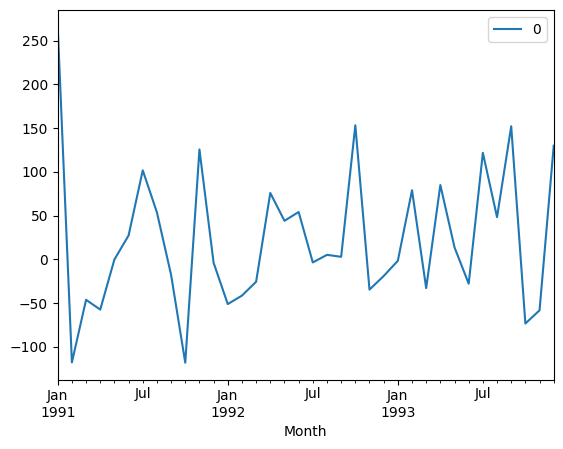

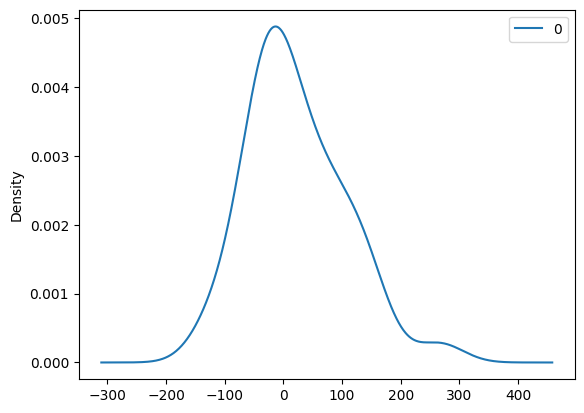

                0
count   36.000000
mean    22.459086
std     82.505331
min   -118.213281
25%    -33.308343
50%      1.361178
75%     76.704967
max    266.000000


In [7]:
from datetime import datetime
from pandas import read_csv
from pandas import DatetimeIndex
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot

def parser(x):
    return datetime.strptime('199'+x, '%Y-%m')

!git clone https://github.com/gilbutITbook/080289.git
%cd 080289/chap05/data/catanddog/

df = read_csv('/content/080289/chap07/data/sales.csv', header=0, parse_dates=[0], index_col=0,
                  date_parser=parser)

series = df.iloc[:, 0]

model = ARIMA(series, order=(5,1,0))
model_fit = model.fit()
print(model_fit.summary())

residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

- 결과를 보면 오류 분포가 한쪽으로 치우쳐 있어 평균값이 0이 아님을 확인할 수 있음

- statsmodels 라이브러리를 이용한 sales 데이터셋 예측

Cloning into '080289'...
remote: Enumerating objects: 2278, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 2278 (delta 4), reused 27 (delta 3), pack-reused 2246 (from 1)
Receiving objects: 100% (2278/2278), 330.30 MiB | 29.55 MiB/s, done.
Resolving deltas: 100% (13/13), done.
Updating files: 100% (2591/2591), done.
/content/080289/chap05/data/catanddog/080289/chap05/data/catanddog
predicted=352.855343, expected=346.300000
predicted=277.398036, expected=329.700000


<ipython-input-8-c7bb629b00dd>:14: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = read_csv('/content/080289/chap07/data/sales.csv', header=0, parse_dates=[0], index_col=0,


predicted=368.753734, expected=445.400000
predicted=331.773635, expected=325.900000
predicted=372.070407, expected=449.300000
predicted=360.020872, expected=411.300000
predicted=454.526230, expected=417.400000
predicted=388.690699, expected=545.500000
predicted=437.632447, expected=477.600000
predicted=516.437624, expected=687.000000
predicted=520.916191, expected=435.300000
predicted=675.594647, expected=587.300000
predicted=505.201016, expected=676.900000
Test MSE: 9118.818
Test MSE: 9118.818


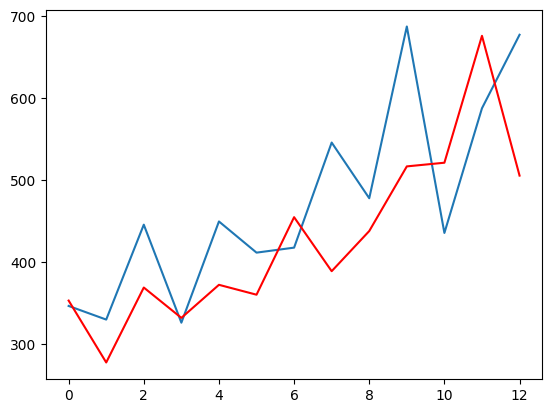

In [8]:
import numpy as np
from pandas import read_csv
from pandas import DatetimeIndex
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

def parser(x):
    return datetime.strptime('199'+x, '%Y-%m')

!git clone https://github.com/gilbutITbook/080289.git
%cd 080289/chap05/data/catanddog/

df = read_csv('/content/080289/chap07/data/sales.csv', header=0, parse_dates=[0], index_col=0,
                  date_parser=parser)

series = df.iloc[:, 0]

X = series.values
X = np.nan_to_num(X)

size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)  # 모델 실행 결과를 predicted로 출력하고,
                                 # test로 분리해 둔 데이터를 expected로 사용하여 출력

error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

- 실제 데이터와 모델 결과를 보면 판매가 계속 늘어날 것으로 예측됨
- 요즘은 ARIMA보다 딥러닝, 특히 순환 신경망이 더 많이 쓰임

## 7.3 순환 신경망(RNN)

* 시간 순서 데이터 처리
* 이전 은닉층이 현재 은닉층 입력
* 반복되는 순환 구조
* 데이터를 기억하며 점진적으로 업데이트
* 전체 입력 정보를 반영하는 ‘기억’ 보유


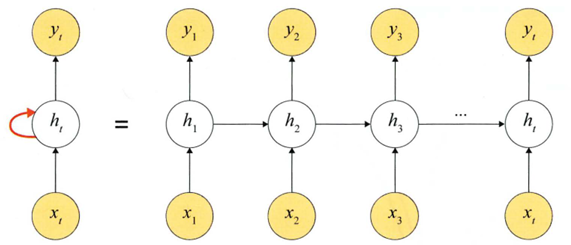

* RNN은 입력(x₁)→기억(h₁) 생성 → 다음 입력(x₂)와 이전 기억(h₁)으로 새 기억(h₂) 생성 → 반복
* 외부 입력과 이전 상태를 받아 현재 상태 갱신
* RNN 유형

  1. 일대일: 순환 없음, 일반 신경망
  2. 일대다: 입력 1개, 출력 여러 개 (예: 이미지 캡션)
  3. 다대일: 입력 여러 개, 출력 1개 (예: 감성 분석)


- 다대일 모델 코드

```
self.em = nn.Embedding(len(TEXT.vocab.stoi), embedding_dim)  # 임베딩 처리
self.rnn = nn.RNNCell(input_dim, hidden_size)               # RNN 적용
self.fc1 = nn.Linear(hidden_size, 256)                       # 완전연결층
self.fc2 = nn.Linear(256, 3)                                 # 출력층
```


- 구조

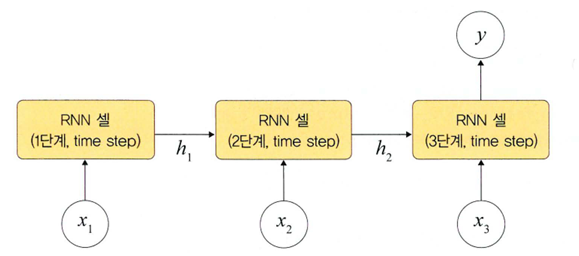

- 구조에 층을 쌓아 올린 적층된 구조

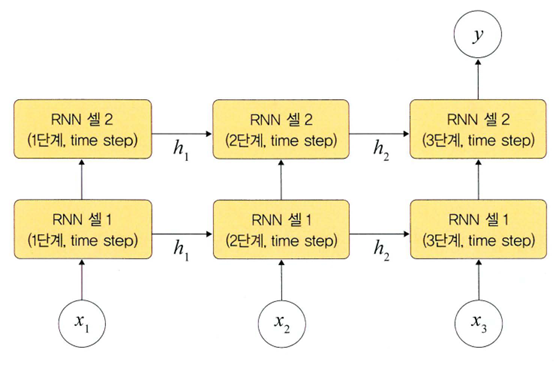

4. 다대다 구조: 입력과 출력 모두 시퀀스
* **대표 예시**: 자동 번역기
* **파이토치 구현**: Seq2Seq 모델 (인코더 → 디코더)
* **텐서플로 구현**: `return_sequences=True` 옵션 사용 (간단)


```
Seq2Seq(
  (encoder): Encoder(
    (embedding): Embedding(7855, 256)  # 입력 단어 임베딩
    (rnn): LSTM(256, 512, num_layers=2, dropout=0.5)  # 2층 LSTM 인코더
    (dropout): Dropout(p=0.5)
  )
  (decoder): Decoder(
    (embedding): Embedding(5893, 256)  # 출력 단어 임베딩
    (rnn): LSTM(256, 512, num_layers=2, dropout=0.5)  # 2층 LSTM 디코더
    (fc_out): Linear(in_features=512, out_features=5893, bias=True)  # 출력층
    (dropout): Dropout(p=0.5)
  )
)
```

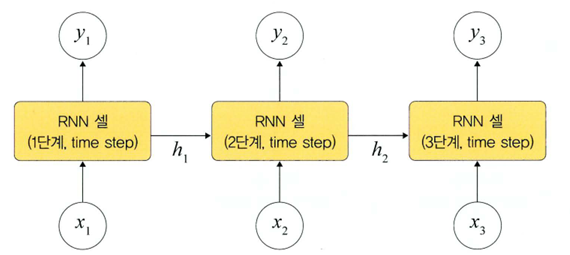

5. 동기화 다대다

* 입력과 출력이 **동일한 길이**를 가짐
* 각 입력에 대해 바로 출력을 생성
* **예시**: 다음 단어 예측, 프레임 단위 비디오 분류
* 입력과 출력의 **시퀀스가 1:1로 대응됨**


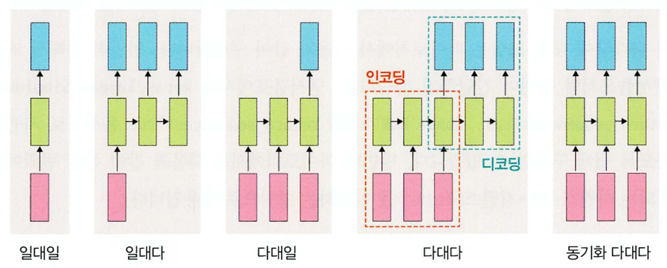

### 7.3.1 RNN 계층과 셀

**RNN 계층 vs 셀 요약**

* **RNN 계층**: 전체 시퀀스를 한 번에 처리
* **RNN 셀**: 한 시점(time step)만 처리 → 루프 구조로 시퀀스 처리
* 즉, **RNN 계층 = RNN 셀 + 반복문 구조**


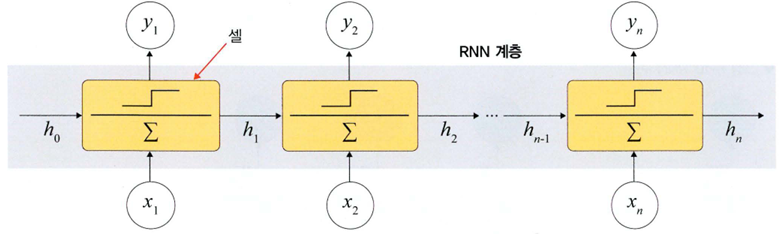

* RNN 계층 : 여러 단계에 동일한 RNN 셀을 반복 적용하는 구조
* RNN 셀은 단일 입력과 이전 상태를 받아 출력과 새 상태를 만듦
* 셀 종류:

  * `nn.RNNCell`: SimpleRNN
  * `nn.GRUCell`: GRU
  * `nn.LSTMCell`: LSTM
* 파이토치에서 계층과 셀을 분리해 구현 가능해 예제도 분리해서 진행
* 자연어 처리, 음성 인식, 손글씨, 센서 등 시계열 데이터 처리에 주로 사용


# RNN 실습

- 필요한 도구 임포트

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

1) 훈련 데이터 전처리하기

* 문자 시퀀스 `apple` 입력 시 `pple!` 출력하는 RNN 구현 실습
* 목적 : RNN 동작 이해
* 입력과 레이블 데이터로부터 중복 제거한 문자 집합(vocabulary) 생성


In [10]:
input_str = 'apple'
label_str = 'pple!'
char_vocab = sorted(list(set(input_str+label_str)))
vocab_size = len(char_vocab)
print('문자 집합의 크기 : {}'.format(vocab_size))

문자 집합의 크기 : 5


- 문자 집합 5개(!, a, e, l, p)
- 입력은 원-핫 벡터로 표현하므로 입력 크기는 5로 설정

In [11]:
input_size = vocab_size # 입력의 크기는 문자 집합의 큭
hidden_size = 5
output_size = 5
learning_rate = 0.1

- 문자 집합에 고유한 정수를 부여

In [12]:
char_to_index = dict((c, i) for i, c in enumerate(char_vocab)) # 문자에 고유한 정수 인덱스 부여
print(char_to_index)

{'!': 0, 'a': 1, 'e': 2, 'l': 3, 'p': 4}


- !은 0, a는 1, e는 2, l은 3, p는 4가 부여

- 예측 결과를 문자로 바꾸기 위해 정수 → 문자 변환용 index_to_char를 만듦

In [13]:
index_to_char={}
for key, value in char_to_index.items():
  index_to_char[value] = key
print(index_to_char)

{0: '!', 1: 'a', 2: 'e', 3: 'l', 4: 'p'}


- 입력 데이터와 레이블 데이터의 각 문자들을 정수로 맵핑

In [14]:
x_data = [char_to_index[c] for c in input_str]
y_data = [char_to_index[c] for c in label_str]
print(x_data)
print(y_data)

[1, 4, 4, 3, 2]
[4, 4, 3, 2, 0]


- 파이토치의 nn.RNN()은 기본적으로 3차원 텐서를 입력받기 때문에 배치 차원을 추가

In [15]:
x_data = [x_data]
y_data = [y_data]
print(x_data)
print(y_data)

[[1, 4, 4, 3, 2]]
[[4, 4, 3, 2, 0]]


- 입력 시퀀스의 각 문자들을 원-핫 벡터로 변환

In [16]:
x_one_hot = [np.eye(vocab_size)[x] for x in x_data]
print(x_one_hot)

[array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.]])]


- 입력 데이터와 레이블 데이터를 텐서로 변환

In [17]:
X = torch.FloatTensor(x_one_hot)
Y = torch.LongTensor(y_data)

<ipython-input-17-c1bfbd518a63>:1: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:254.)
  X = torch.FloatTensor(x_one_hot)


- 각 텐서의 크기를 확인

In [18]:
print('훈련 데이터의 크기 : {}'.format(X.shape))
print('레이블의 크기 : {}'.format(Y.shape))

훈련 데이터의 크기 : torch.Size([1, 5, 5])
레이블의 크기 : torch.Size([1, 5])


2) 모델 구현하기

In [20]:
class Net(torch.nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super(Net, self).__init__()
    self.rnn = torch.nn.RNN(input_size, hidden_size, batch_first=True) # RNN 셀 구현
    self.fc = torch.nn.Linear(hidden_size, output_size, bias=True) # 출력층 구현

  def forward(self, x): # 구현한 RNN 셀과 출력층을 연결
      x, _status = self.rnn(x)
      x = self.fc(x)
      return x

- 클래스로 정의한 모델을 net에 저장

In [21]:
net = Net(input_size, hidden_size, output_size)

- 입력된 모델에 입력을 넣어서 출력의 크기를 확인

In [22]:
outputs = net(X)
print(outputs.shape) # 3차원 텐서

torch.Size([1, 5, 5])


-> (1,5,5) : 각각 배치 차원, 시점(timesteps), 출력의 크기

- 정확도를 측정할 때는 이를 모두 펼쳐서 계산 : view를 사용하여 배치 차원과 시점 차원을 하나로 만듦

In [23]:
print(outputs.view(-1, input_size).shape)

torch.Size([5, 5])


In [24]:
print(Y.shape)
print(Y.view(-1).shape)

torch.Size([1, 5])
torch.Size([5])


- 옵티마이저와 손실 함수를 정의

In [25]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), learning_rate)

- 100번의 에포크를 학습

In [26]:
for i in range(100):
  optimizer.zero_grad()
  outputs = net(X)
  loss = criterion(outputs.view(-1, input_size), Y.view(-1)) # view를 하는 이유는 Batch 차원 제거를 위해
  loss.backward() # 기울기 계산
  optimizer.step() # 아까 optimizer 선언 시 넣어둔 파라미터 업데이트

  # 아래 세 줄은 모델이 실제 어떻게 예측했는지를 확인하기 위한 코드
  result = outputs.data.numpy().argmax(axis=2) # 최종 예측값인 각 time-step 별 5차원 벡터에 대해서 가장 높은 값의 인덱스를 선택
  result_str = ''.join([index_to_char[c] for c in np.squeeze(result)])
  print(i, "loss: ", loss.item(), "prediction: ", result, "true Y: ", y_data, "prediction str: ", result_str)

0 loss:  1.7653205394744873 prediction:  [[3 3 3 1 1]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  lllaa
1 loss:  1.5188852548599243 prediction:  [[3 2 2 2 2]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  leeee
2 loss:  1.272579550743103 prediction:  [[4 3 3 2 2]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  pllee
3 loss:  1.0519393682479858 prediction:  [[4 3 3 2 0]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  plle!
4 loss:  0.8389140367507935 prediction:  [[4 4 3 2 0]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  pple!
5 loss:  0.6090891361236572 prediction:  [[4 4 3 2 0]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  pple!
6 loss:  0.426069974899292 prediction:  [[4 4 3 2 0]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  pple!
7 loss:  0.30240803956985474 prediction:  [[4 4 3 2 0]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  pple!
8 loss:  0.20544059574604034 prediction:  [[4 4 3 2 0]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  pple!
9 loss:  0.13932326436042786 prediction:  [[4 4 3 2 0]]

2. 더 많은 데이터로 학습한 문자 단위 RNN(Char RNN)

In [27]:
import torch
import torch.nn as nn
import torch.optim as optim

1) 훈련 데이터 전처리하기

- 임의의 샘플을 만듦

In [28]:
sentence = ("if you want to build a ship, don't drum up people together to "
            "collect wood and don't assign them tasks and work, but rather "
            "teach them to long for the endless immensity of the sea.")

- 문자 집합을 생성하고, 각 문자에 고유한 정수를 부여

In [29]:
char_set = list(set(sentence)) # 중복을 제거한 문자 집합 생성
char_dic = {c: i for i, c in enumerate(char_set)} # 각 문자에 정수 인코딩

In [30]:
print(char_dic) # 공백도 여기서는 하나의 원소

{' ': 0, 'u': 1, 'w': 2, 'r': 3, 's': 4, 'i': 5, 'y': 6, 'a': 7, 'o': 8, 'b': 9, 'e': 10, "'": 11, 'f': 12, 'c': 13, 'd': 14, '.': 15, 'm': 16, 't': 17, 'l': 18, 'k': 19, 'h': 20, 'g': 21, 'p': 22, ',': 23, 'n': 24}


- 각 문자에 정수가 부여되었으며, 총 25개의 문자가 존재
- 문자 집합의 크기를 확인

In [31]:
dic_size = len(char_dic)
print('문자 집합의 크기 : {}'.format(dic_size))

문자 집합의 크기 : 25


* 문자 집합 크기: 25
* 입력 크기: 원-핫 벡터, 문자 집합 크기와 동일
* hidden\_size: 입력 크기와 같음 (변경 가능)
* sequence\_length: 10 (데이터를 10개씩 나누기 위해)


In [32]:
# 하이퍼파라미터 설정
hidden_size = dic_size
sequence_length = 10 # 임의 숫자 지정
learning_rate = 0.1

- 임의로 지정한 sequence_length 값인 10의 단위로 샘플들을 잘라서 데이터를 만드는 모습

In [33]:
# 데이터 구성
x_data = []
y_data = []

for i in range(0, len(sentence) - sequence_length):
  x_str = sentence[i:i + sequence_length]
  y_str = sentence[i + 1: i + sequence_length + 1]
  print(i, x_str, '->', y_str)

  x_data.append([char_dic[c] for c in x_str]) # x str to index
  y_data.append([char_dic[c] for c in y_str]) # y str to index

0 if you wan -> f you want
1 f you want ->  you want 
2  you want  -> you want t
3 you want t -> ou want to
4 ou want to -> u want to 
5 u want to  ->  want to b
6  want to b -> want to bu
7 want to bu -> ant to bui
8 ant to bui -> nt to buil
9 nt to buil -> t to build
10 t to build ->  to build 
11  to build  -> to build a
12 to build a -> o build a 
13 o build a  ->  build a s
14  build a s -> build a sh
15 build a sh -> uild a shi
16 uild a shi -> ild a ship
17 ild a ship -> ld a ship,
18 ld a ship, -> d a ship, 
19 d a ship,  ->  a ship, d
20  a ship, d -> a ship, do
21 a ship, do ->  ship, don
22  ship, don -> ship, don'
23 ship, don' -> hip, don't
24 hip, don't -> ip, don't 
25 ip, don't  -> p, don't d
26 p, don't d -> , don't dr
27 , don't dr ->  don't dru
28  don't dru -> don't drum
29 don't drum -> on't drum 
30 on't drum  -> n't drum u
31 n't drum u -> 't drum up
32 't drum up -> t drum up 
33 t drum up  ->  drum up p
34  drum up p -> drum up pe
35 drum up pe -> rum up peo
36

- 총 170개의 샘플이 생성
- 각 샘플의 각 문자들은 고유한 정수로 인코딩이 된 상태
- 첫번째 샘플의 입력 데이터와 레이블 데이터를 출력

In [34]:
print(x_data[0])
print(y_data[0])

[5, 12, 0, 6, 8, 1, 0, 2, 7, 24]
[12, 0, 6, 8, 1, 0, 2, 7, 24, 17]


- 입력 시퀀스에 대해서 원-핫 인코딩을 수행하고, 입력 데이터와 레이블 데이터를 텐서로 변환

In [35]:
x_one_hot = [np.eye(dic_size)[x] for x in x_data] # 데이터는 원-핫 인코딩
X = torch.FloatTensor(x_one_hot)
Y = torch.LongTensor(y_data)

- 훈련 데이터와 레이블 데이터의 크기를 확인

In [36]:
print('훈련 데이터의 크기 : {}'.format(X.shape))
print('레이블의 크기 : {}'.format(Y.shape))

훈련 데이터의 크기 : torch.Size([170, 10, 25])
레이블의 크기 : torch.Size([170, 10])


- 원-핫 인코딩 된 결과를 보기 위해서 첫번째 샘플만 출력

In [37]:
print(X[0])

tensor([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,

- 레이블 데이터의 첫번째 샘플도 출력

In [38]:
print(Y[0])

tensor([12,  0,  6,  8,  1,  0,  2,  7, 24, 17])


2) 모델 구현하기

- 이번에는 은닉층 2개

In [39]:
class Net(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, layers): # 현재 hidden_size는 dic_size와 같음.
        super(Net, self).__init__()
        self.rnn = torch.nn.RNN(input_dim, hidden_dim, num_layers=layers, batch_first=True)
        self.fc = torch.nn.Linear(hidden_dim, hidden_dim, bias=True)

    def forward(self, x):
        x, _status = self.rnn(x)
        x = self.fc(x)
        return x

In [40]:
net = Net(dic_size, hidden_size, 2) # 이번에는 층을 두 개 쌓습니다.

- 비용 함수와 옵티마이저를 선언

In [41]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), learning_rate)

- 모델에 입력을 넣어서 출력의 크기를 확인

In [42]:
outputs = net(X)
print(outputs.shape) # 3차원 텐서

torch.Size([170, 10, 25])


In [43]:
print(outputs.view(-1, dic_size).shape) # 2차원 텐서로 변환.

torch.Size([1700, 25])


- 레이블 데이터의 크기를 다시 복습

In [44]:
print(Y.shape)
print(Y.view(-1).shape)

torch.Size([170, 10])
torch.Size([1700])


- 옵티마이저와 손실 함수를 정의

In [45]:
for i in range(100):
    optimizer.zero_grad()
    outputs = net(X) # (170, 10, 25) 크기를 가진 텐서를 매 에포크마다 모델의 입력으로 사용
    loss = criterion(outputs.view(-1, dic_size), Y.view(-1))
    loss.backward()
    optimizer.step()

    # results의 텐서 크기는 (170, 10)
    results = outputs.argmax(dim=2)
    predict_str = ""
    for j, result in enumerate(results):
        if j == 0: # 처음에는 예측 결과를 전부 가져오지만
            predict_str += ''.join([char_set[t] for t in result])
        else: # 그 다음에는 마지막 글자만 반복 추가
            predict_str += char_set[result[-1]]

    print(predict_str)

....................t...................................................................................................................................o..........o...............
                                                                                                                                                                                   
nw.tew.tewwywww.''w'wwyww.'ww.www.wwwww'www'wwww.ww''ww'wwyww'wwwww'w'cw''.cww.,'ww.'wwww.www.wwww'ww''ww'w,www.'ww.'.www.www.w'w'w''ww,ww,'ww''ww.www'wwww.www.www.mww.wwww''ww'.w
ddd eeedddddddo doedd d  eddd d dddddddd ed dddd d dddddd d dd ddedddd ddddddd ddde   dddddd e dddd  dddd  ddd dddd   ddeddd d   d d  d do dddd d  ddddddd  dd  dddddd eodd  d eddd
o to osoeeo o toio     o o        o  o            o        o to    o  o    o  t     o         oito    o    o   it  o        o t  t     o toi   o  oh                    o  o  o    
  t        t        t t     t          t         t            t           t   t                     

- 처음에는 이상한 예측을 하지만 마지막 에포크에서는 꽤 정확한 문자을 생성하는 것을 볼 수 있음